<a href="https://colab.research.google.com/github/Napawan2005/NLP-517432/blob/main/660710086_Information_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **660710086 นภัสวรรณ กอสินประเสริฐ**

# Information Extraction

Information Extraction เป็นการหาความสัมพันธ์ (Relation Extraction) มักจะเกิดขึ้น ภายในประโยคเดียวกัน (Intra-sentence) เช่น "ใคร ทำอะไร ที่ไหน"




## 1. NLP Foundation for Extraction
- Concept ของ Information Extraction (IE)
- Named Entity Recognition (NER)
- Part-of-Speech (POS) และ Dependency Parsing

**เป้าหมายหลัก:** เข้าใจกระบวนการแปลง "ข้อความดิบ" (Raw Text) ให้เป็น "ข้อมูลที่มีโครงสร้าง" (Structured Data) ผ่าน 3 ขั้นตอนสำคัญ:
- Tokenization/POS
- Named Entity Recognition (NER)
- Dependency Parsing

**Tools Overview:**
- **NLTK**: เก่าแก่ เป็นรากฐานที่ดีสำหรับการเรียนรู้ทีละขั้นตอน แต่ช้าและใช้ยากในการนำไปใช้งานจริง
- **spaCy**: เร็ว ใช้งานง่าย รวมทุกอย่างมาให้แล้ว เป็นที่นิยมนำไปใช้ในงานจริง
- **TextBlob**: ใช้ง่ายที่สุด เหมาะกับงานง่ายๆ ไม่ซับซ้อน

In [4]:
#เตรียมความพร้อม ดาวน์โหลดโมเดลที่จำเป็น
# 1. Install Libraries
!pip install spacy nltk textblob

# 2. Download Models
# สำหรับ NLTK
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# สำหรับ SpaCy
!python -m spacy download en_core_web_sm

# สำหรับ TextBlob
!python -m textblob.download_corpora

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading 

**Example layers for an NLP pipeline**

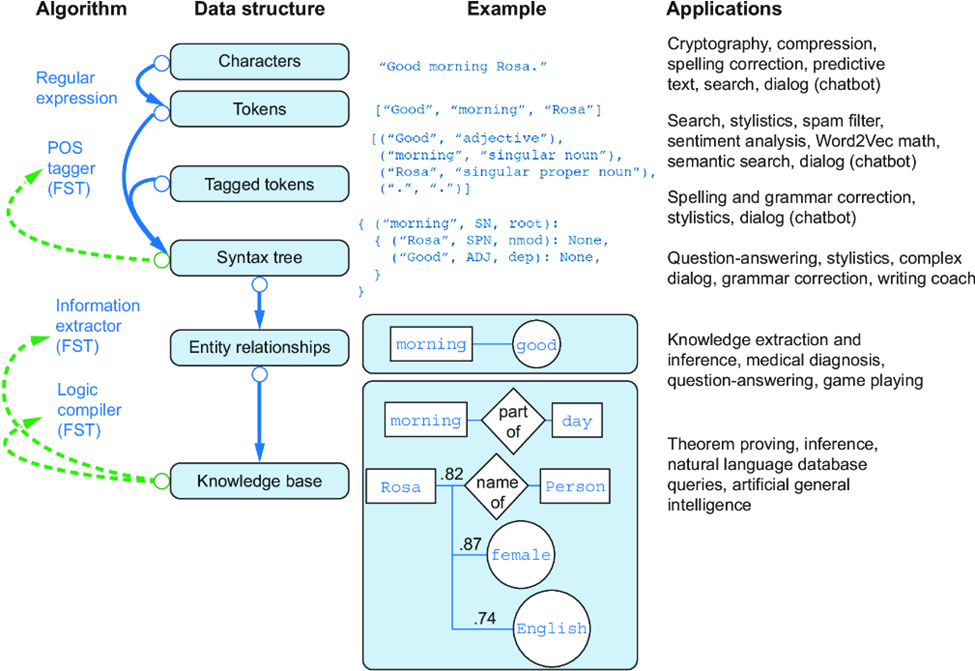

**IE Pipeline** เริ่มจาก
- Tokenization แบ่งข้อความเป็นประโยค และแบ่งประโยคเป็น tokens
- POS tagging ระบุหน้าที่ของคำให้กับแต่ละ tokens
- NER ระบุว่าคำนามแต่ละตัวเป็นคำนามประเภทใด
- Dependency Parsing ระบุว่า token แต่ละตัวทำหน้าที่เป็นอะไรในประโยค โดยระบุว่าแต่ละคำมีความสัมพันธ์แบบขึ้นต่อกันอย่างไร

Input: ตัวอย่างประโยค
> "Steve Jobs founded Apple in 1976."

- Step 0 (Tokenize): แบ่งข้อความเป็นประโยค และนำแต่ละประโยคแบ่งเป็นคำ
- Step 1 (POS): รู้ว่า founded เป็น Verb, Apple เป็น Noun
- Step 2 (NER): รู้ว่า Steve Jobs คือ Person, Apple คือ Organization
- Step 3 (Dependency): รู้ว่า Steve Jobs เป็นประธาน (Subject) ของ founded

Output: ความสัมพันธ์ระหว่างคำในประโยค (Entity Relationships)
> (Steve Jobs, founded, Apple)

**NP chek** : NP Chunking (Noun Phrase Chunking) คือกระบวนการแบ่งกลุ่มคำในประโยคออกมาเป็น "ก้อน" (Chunk) ที่ทำหน้าที่เป็น นามวลี (Noun Phrase - NP) โดยไม่ได้สนใจโครงสร้างลึกซึ้งถึงขั้นความสัมพันธ์ระหว่างคำ (Parsing) แต่มุ่งเน้นแค่การหาขอบเขตว่า "ตรงไหนคือกลุ่มคำนาม" เท่านั้น<br><br>
**ขั้นตอนการทำงาน (Step-by-Step)
โดยปกติ NP Chunking จะทำหลังจากขั้นตอน Part-of-Speech (POS) Tagging (การระบุชนิดของคำ)**

1. ประโยคตั้งต้น: "The little yellow dog barked at the cat."

2. ระบุชนิดคำ (POS Tagging):

- The (DT - คำนำหน้า)

- little (JJ - คุณศัพท์)

- yellow (JJ - คุณศัพท์)

- dog (NN - คำนาม)

- barked (VBD - กริยา)

 at (IN - บุพบท)

- the (DT - คำนำหน้า)

- cat (NN - คำนาม)

3. ทำ NP Chunking (มัดรวมคำนามและคำขยาย): ระบบจะมองหาแพทเทิร์น เช่น {<DT>?<JJ>*<NN>} (คำนำหน้า + คุณศัพท์กี่ตัวก็ได้ + คำนาม)

> Chunk 1: [NP The little yellow dog]

> Chunk 2: [NP the cat]

(สังเกตว่าคำกริยา "barked" และบุพบท "at" จะถูกปล่อยทิ้งไว้ ไม่ถูกมัดรวม)

> 💬 พวกกู google google calendar คือ ใคร ทำอะไร ที่ไหน

### Step 0: Preprocessing (Sentence and word tokenization)
การแบ่งประโยคสามารถทำได้โดย
- เขียน regular expression เพื่อแบ่งประโยค (ไม่ใช้ split)
- ใช้ฟังก์ชันใน nltk
- ใช้ฟังก์ชันใน spacy

ตัวอย่าง Preprocessing ในการแบ่งประโยค (sentence tokenization)

แบบที่ 1 ใช้ regular expression

In [5]:
import re

regex = r'[!.?]+[\s$]+' # regular expression ที่ใช้หาตำแหน่งที่ประโยคจบลง
# โดยหารูปแบบที่มีเครื่องหมายวรรคตอน (!,.,?) ตั้งแต่หนึ่งตัวขึ้นไป (+) ตามด้วยช่องว่าง (\s) หรือจุดสิ้นสุดของข้อความ ($)ที่มีตั้งแต่หนึ่งตัวขึ้นไป (+) เพื่อใช้ในการแบ่งประโยค

text1 = "Hello World.... Are you there?!?! I'm going to Mars!"
ex1 = re.split(regex, text1)
print(ex1)

text2 = "The author wrote \"'It isn't conscious.' Turing said.\""
ex2 = re.split(regex, text2)
print(ex2)

text3 = "I went to GT. You? Dr. Strange lives in N.Y. city."
ex3 = re.split(regex, text3)
print(ex3)

text4 = "Elon Musk founded SpaceX. He also bought Twitter. It is based in San Francisco. "
ex4 = re.split(regex, text4)
print(ex4)

['Hello World', 'Are you there', "I'm going to Mars!"]
['The author wrote "\'It isn\'t conscious.\' Turing said."']
['I went to GT', 'You', 'Dr', 'Strange lives in N.Y', 'city.']
['Elon Musk founded SpaceX', 'He also bought Twitter', 'It is based in San Francisco', '']



---

### **หลักการทำงานหลัก 4 ข้อของ Regex**

Regex ไม่ได้มองข้อความเป๊ะๆ แต่มองเป็น **"กฎ" (Rules)** โดยประกอบด้วยส่วนสำคัญดังนี้:

#### 1. Literals (ตัวอักษรปกติ)

คือตัวอักษรที่เราต้องการค้นหาตรงๆ

* เช่น ถ้าเขียน `Dog` ระบบก็จะหาคำว่า "Dog"

#### 2. Metacharacters (อักขระพิเศษ)

นี่คือหัวใจของ Regex เป็นสัญลักษณ์ที่แทนความหมายอื่น ไม่ใช่ตัวมันเอง

* `.` (จุด) = แทนตัวอะไรก็ได้ 1 ตัว
* *ตัวอย่าง:* `h.t` จะเจอทั้ง "hat", "hot", "hit", "hut"


* `^` (Caret) = ต้องขึ้นต้นบรรทัดด้วยคำนี้
* `$` (Dollar sign) = ต้องลงท้ายบรรทัดด้วยคำนี้

#### 3. Character Classes (กลุ่มตัวอักษร)

ใช้กำหนดขอบเขตว่าตรงนี้เป็น "ประเภท" อะไรได้บ้าง

* `[ ]` = เลือกตัวไหนก็ได้ในวงเล็บ
* *ตัวอย่าง:* `[bm]at` จะเจอแค่ "bat" หรือ "mat" (ไม่เอา cat)


* `\d` = แทนตัวเลข (0-9)
* `\w` = แทนตัวอักษรหรือตัวเลข (Word character)
* `\s` = แทนช่องว่าง (Space, Tab)

#### 4. Quantifiers (ตัวระบุจำนวน)

ใช้บอกว่ากฎข้างหน้า ต้องเกิดขึ้นกี่ครั้ง

* `*` = มีหรือไม่มีก็ได้ (0 หรือมากกว่า)
* `+` = ต้องมีอย่างน้อย 1 ตัว (1 หรือมากกว่า)
* `?` = มีหรือไม่มีก็ได้ (0 หรือ 1)
* `{n}` = ต้องมีจำนวน n ตัวเป๊ะๆ
* *ตัวอย่าง:* `\d{3}` หมายถึงหาเลขที่เรียงกัน 3 ตัว (เช่น 081, 123, 999)



---

### ตัวอย่างการประกอบร่าง (เพื่อเห็นภาพ)

สมมติเราต้องการหา **"เบอร์โทรศัพท์มือถือไทย"** (เช่น 081-123-4567)

**หลักการคิดแบบ Regex:**

1. ขึ้นต้นด้วยเลข 0 เสมอ -> `^0`
2. ตามด้วยเลขอะไรก็ได้อีก 1 ตัว (เช่น 8, 9, 6) -> `\d`
3. ตามด้วยเลขอีก 1 ตัว -> `\d`
4. มีขีดคั่น -> `-`
5. ตามด้วยเลข 3 ตัว -> `\d{3}`
6. มีขีดคั่น -> `-`
7. จบด้วยเลข 4 ตัว -> `\d{4}`

**Pattern ที่ได้:** `^0\d\d-\d{3}-\d{4}`

---

### การทำงานของ Regex Engine (กลไกเบื้องหลัง)

เมื่อคอมพิวเตอร์รัน Regex มันจะทำงานแบบ **"Left-to-Right" (ซ้ายไปขวา)**:

1. **Cursor:** มันจะเอา Pattern ไปทาบกับข้อความทีละตัวอักษร
2. **Match:** ถ้าตัวแรกตรง มันจะขยับไปเช็กตัวถัดไป
3. **Backtracking (การย้อนกลับ):** ถ้าเช็กไปเรื่อยๆ แล้วเจอจุดที่ไม่ตรง มันจะถอยหลังกลับไปหาทางเลือกอื่น (ในกรณีที่เราใช้เงื่อนไขที่ซับซ้อน) จนกว่าจะหาเจอ หรือจนกว่าจะหมดทางหา



แบบที่ 2 ใช้ฟังก์ชันใน nltk

In [6]:
# ทดลองใช้ sent_tokenize ใน nltk กับ text1 - text4 แล้วสังเกตผล
import nltk
# ต้อง download punkt ก่อนสำหรับตัดประโยค
# nltk.download('punkt', quiet=True)
# text4 = "Elon Musk founded SpaceX. He also bought Twitter. It is based in San Francisco. "
sentences_text1 = nltk.sent_tokenize(text4)
print("nltk Sentences:")
for sent in sentences_text1:
  print(f">> {sent}")

nltk Sentences:
>> Elon Musk founded SpaceX.
>> He also bought Twitter.
>> It is based in San Francisco.


In [7]:
# ทดลองใช้ sent_tokenize ใน nltk กับ text1 - text4 แล้วสังเกตผล
import nltk
# ต้อง download punkt ก่อนสำหรับตัดประโยค
# nltk.download('punkt', quiet=True)
# text1 = "Hello World.... Are you there?!?! I'm going to Mars!"
sentences_text1 = nltk.sent_tokenize(text1)
print("nltk Sentences:")
for sent in sentences_text1:
  print(f">> {sent}")

nltk Sentences:
>> Hello World.... Are you there?!?!
>> I'm going to Mars!


In [8]:
# ทดลองใช้ sent_tokenize ใน nltk กับ text1 - text4 แล้วสังเกตผล
import nltk
# ต้อง download punkt ก่อนสำหรับตัดประโยค
# nltk.download('punkt', quiet=True)
# text2 = "The author wrote \"'It isn't conscious.' Turing said.\""
sentences_text1 = nltk.sent_tokenize(text2)
print("nltk Sentences:")
for sent in sentences_text1:
  print(f">> {sent}")

nltk Sentences:
>> The author wrote "'It isn't conscious.'
>> Turing said."


In [9]:
# ทดลองใช้ sent_tokenize ใน nltk กับ text1 - text4 แล้วสังเกตผล
import nltk
# ต้อง download punkt ก่อนสำหรับตัดประโยค
# nltk.download('punkt', quiet=True)
# text3 = "I went to GT. You? Dr. Strange lives in N.Y. city."
sentences_text1 = nltk.sent_tokenize(text3)
print("nltk Sentences:")
for sent in sentences_text1:
  print(f">> {sent}")

nltk Sentences:
>> I went to GT.
>> You?
>> Dr.
>> Strange lives in N.Y. city.


แบบที่ 3 ใช้ฟังก์ชันใน spacy

In [10]:
## ทดลองใช้ sent_tokenize ใน nltk กับ text1 - text4 แล้วสังเกตผล
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(text1)

print("spaCy Sentences:")
for sent in doc.sents:
    print(f">> {sent.text}")

spaCy Sentences:
>> Hello World....
>> Are you there?!?!
>> I'm going to Mars!


In [11]:
## ทดลองใช้ sent_tokenize ใน nltk กับ text1 - text4 แล้วสังเกตผล
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(text2)

print("spaCy Sentences:")
for sent in doc.sents:
    print(f">> {sent.text}")

spaCy Sentences:
>> The author wrote "'It isn't conscious.'
>> Turing said."


In [12]:
## ทดลองใช้ sent_tokenize ใน nltk กับ text1 - text4 แล้วสังเกตผล
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(text3)

print("spaCy Sentences:")
for sent in doc.sents:
    print(f">> {sent.text}")

spaCy Sentences:
>> I went to GT.
>> You?
>> Dr. Strange lives in N.Y. city.


### อภิปรายผลการเปรียบเทียบการตัดประโยคทั้ง 3 แบบ เลือกแบบไหนในกรณีอะไร

- แบบแรก ทีกำหนดรูปแบบ regex เองที่เป็นไปได้
- แบบที่ nltk จะมีการแบ่งประโยคให้ แบบไม่ต้แงมีความสัมพันส์กัน
- แบบที่ spacy จะมีการเก็บโครงสร้างประโยค พวกคำย่อก็สามารถใช้ได้ แต่ละคำมีความสัมพันธ์กัน


### Step 1: POS Tagging

จากขั้นตอนตัดประโยคก่อนหน้า เราจะได้ input สำหรับการทำ IE เพื่อทำการ Process ทีละประโยค จากนั้นจะเป็นการตัดคำในประโยค และเริ่มการทำ POS Taggaing

**POS tagging** คือ การระบุหน้าที่หรือชนิดของคำ (Part of Speech - POS) ว่าทำหน้าที่อะไรในทางไวยากรณ์ (Grammar) เช่น Noun, Verb, Adjective เป็นต้น

ทำไมต้องมี POS
ภาษามีความซับซ้อน คำเดียวกันเขียนเหมือนกัน แต่ถ้าปรากฎอยู่คนละที่ก็ทำให้ความหมายเปลี่ยนและหน้าที่ของคำเปลี่ยนได้

ตัวอย่าง: คำว่า "book"
- "I read a book." -> book เป็น คำนาม (NOUN) (สิ่งของ)
- "I book a flight." -> book เป็น คำกริยา (VERB) (การจอง)

ดังนั้น POS Tagging ช่วยให้คอมพิวเตอร์เลือกความหมายได้ถูกต้องจากบริบทแวดล้อม


ตัวอย่างขั้นตอน Preprocessing & POS Tagging: แยกคำและระบุชนิดของคำ

In [13]:
import nltk
from nltk.tokenize import word_tokenize

text = "Elon Musk bought Twitter for $44 billion."

# 1. Tokenize (ตัดคำ)
tokens = word_tokenize(text)
print("Tokens:", tokens)

# 2. POS Tagging (ระบุชนิดคำ)
# NNP = Proper Noun (ชื่อเฉพาะ), VBD = Verb อดีต
pos_tags = nltk.pos_tag(tokens)
print("POS Tags:", pos_tags)

Tokens: ['Elon', 'Musk', 'bought', 'Twitter', 'for', '$', '44', 'billion', '.']
POS Tags: [('Elon', 'NNP'), ('Musk', 'NNP'), ('bought', 'VBD'), ('Twitter', 'NNP'), ('for', 'IN'), ('$', '$'), ('44', 'CD'), ('billion', 'CD'), ('.', '.')]


ความหมายของ Tag แต่ละตัว ตามมาตรฐานของ UPenn

In [14]:
nltk.download('tagsets', quiet=True)#คือชุดข้อมูลที่เป็น เอกสารอ้างอิง (Documentation) ครับ มันเก็บคำอธิบายว่ารหัสย่อแต่ละตัวหมายถึงอะไร
nltk.download('tagsets_json', quiet=True)#คล้ายอันบนแต่อยู่รูปแบบ json

nltk.help.upenn_tagset('NNP') # For a specific tag, e.g., NNP

print("\nDocumentation for each tag")
nltk.help.upenn_tagset()#อธิบายทั้งหมด

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...

Documentation for each tag
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX:

ความหมายของ Tag แต่ละตัว ตามมาตรฐานของ Universal Tagset
- ADJ: adjective (คำคุณศัพท์)
- ADP: adposition (คำบุพบท)
- ADV: adverb (คำวิเศษณ์)
- CONJ: conjunction (คำสันธาน)
- DET: determiner (คำนำหน้านาม)
- NOUN: noun (คำนาม)
- NUM: numeral (คำบอกจำนวน)
- PRT: particle (คำอนุภาค)
- PRON: pronoun (คำสรรพนาม)
- VERB: verb (คำกริยา)
- .: punctuation (เครื่องหมายวรรคตอน)
- X: other (อื่นๆ)

ตัวอย่าง POS Tagging ตามมาตรฐาน Universal Tagset

In [15]:
nltk.download('universal_tagset', quiet=True)

text = "Elon Musk bought Twitter for $44 billion."

# 1. Tokenize (ตัดคำ)
tokens = word_tokenize(text)
print("Tokens:", tokens)

# 2. POS Tagging (ระบุชนิดคำ)
# NNP = Proper Noun (ชื่อเฉพาะ), VBD = Verb อดีต
pos_tags = nltk.pos_tag(tokens, tagset="universal")
print("POS Tags:", pos_tags)

Tokens: ['Elon', 'Musk', 'bought', 'Twitter', 'for', '$', '44', 'billion', '.']
POS Tags: [('Elon', 'NOUN'), ('Musk', 'NOUN'), ('bought', 'VERB'), ('Twitter', 'NOUN'), ('for', 'ADP'), ('$', '.'), ('44', 'NUM'), ('billion', 'NUM'), ('.', '.')]


ตัวอย่าง POS Tagging โดยใช้ spaCy

WED(เรียนเพิ่มเติม) : https://spacy.io/api

In [16]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "Elon Musk bought Twitter for $44 billion in 2022."
doc = nlp(text)

print(f"{'Text':<15} {'POS':<10}")
print("-" * 40)
for token in doc:
    print(f"{token.text:<15} {token.pos_:<10} {token.tag_:<10}")
print("-" * 40)

Text            POS       
----------------------------------------
Elon            PROPN      NNP       
Musk            PROPN      NNP       
bought          VERB       VBD       
Twitter         PROPN      NNP       
for             ADP        IN        
$               SYM        $         
44              NUM        CD        
billion         NUM        CD        
in              ADP        IN        
2022            NUM        CD        
.               PUNCT      .         
----------------------------------------


tag set แต่ละตัวใช้คำสั่งว่าอะไร ของ spaCy

In [17]:
print(f"{'Text':<15} {'Tag':<10}")
print("-" * 40)
for token in doc:
    print(f"{token.text:<15} {token.tag_:<10}")
print("-" * 40)

Text            Tag       
----------------------------------------
Elon            NNP       
Musk            NNP       
bought          VBD       
Twitter         NNP       
for             IN        
$               $         
44              CD        
billion         CD        
in              IN        
2022            CD        
.               .         
----------------------------------------


https://spacy.io/api/tagger/

### Step 2: NER

**Named Entity Recognition (NER)** คือกระบวนการค้นหาและระบุประเภทของคำเฉพาะ  ในประโยคได้อัตโนมัติ โดยทั่วไปจะให้ความสำคัญกับคำนามเฉพาะ (Proper Noun) เป็นพิเศษ แต่ก็ยังมีคำประเภทอื่นที่ถือว่าเป็น Name Entity ด้วยเช่นกัน เช่น

- Person (คน): Elon Musk, Lisa
- Organization (องค์กร): Google, Tesla, NASA
- Location/GPE (สถานที่): Thailand, Bangkok
- Date/Time (เวลา): 2024, yesterday
- Money (เงิน): $1 billion, 500 Baht

ประโยชน์: เปลี่ยนข้อความยาวๆ ให้เป็นข้อมูลที่สำคัญ เพื่อนำไปสร้างเป็น Node ใน Knowledge Graph

ประเภทของ NER แต่ละ library มีความแตกต่างกันขึ้นอยู๋กับ dataset ที่โมเดลนั้นใช้ในการเทรน โดยมีการแบ่งประเภทดังนี้
- nltk แบ่งได้ 9 ประเภทตามหมวดหลักๆ คือ
  - PERSON: คน
  - ORGANIZATION: องค์กร
  - LOCATION: สถานที่ (รวมๆ)
  - GPE: สถานที่ทางการปกครอง
  - FACILITY: สิ่งก่อสร้าง
  - DATE: วันที่
  - TIME: เวลา
  - MONEY: เงิน
  - PERCENT: เปอร์เซ็นต์
- spaCy แบ่งเป็น 18 ประเภท โดยจัดไว้ใน 4 หมวดหมู่ใหญ่ คือ
  - คน/กลุ่มคน: PERSON: คน, NORP: สัญชาติ ศาสนา กลุ่มการเมือง, ORG: บริษัท, หน่วยงาน, สถาบัน
  - สถานที่: GPE: ประเทศ เมือง รัฐ, LOC: สถานที่ทางภูมิศาสตร์ที่ไม่ใช่การปกครอง (ภูเขา แม่น้ำ),
FAC: สิ่งก่อสร้าง (สนามบิน ทางด่วน สะพาน)
  - สิ่งของ/ผลงาน: PRODUCT: ยานพาหนะ อาหาร, EVENT: เหตุการณ์,
WORK_OF_ART: ชื่อหนังสือ/เพลง/หนัง, LAW: กฎหมาย, LANGUAGE: ภาษา
  - เวลา/ตัวเลข: DATE: วันที่ ยุคสมัย, TIME: เวลา,PERCENT: เปอร์เซ็นต์,MONEY: จำนวนเงิน, QUANTITY: ปริมาณ (น้ำหนัก ระยะทาง), ORDINAL: ลำดับที่,
CARDINAL: จำนวนนับ (one, two, 100)



ตัวอย่าง NER โดยใช้ nltk

In [18]:
nltk.download('maxent_ne_chunker_tab', quiet=True)

text = "Elon Musk bought Twitter for $44 billion."

# 1. Tokenize (ตัดคำ)
tokens = word_tokenize(text)
print("Tokens:", tokens)

# 2. POS Tagging (ระบุชนิดคำ)
# NNP = Proper Noun (ชื่อเฉพาะ), VBD = Verb อดีต
pos_tags = nltk.pos_tag(tokens)
print("POS Tags:", pos_tags)


#3. NER (ระบุ name entity)
chunks = nltk.ne_chunk(pos_tags)
# แสดงผลเป็น tree object
print(chunks)
# ปรับให้แสดงผลดูง่ายขึ้น
print("\nNER Tree Structure:")
for chunk in chunks:
    if hasattr(chunk, 'label'):
        print(f"Entity: {' '.join(c[0] for c in chunk)} | Type: {chunk.label()}")

Tokens: ['Elon', 'Musk', 'bought', 'Twitter', 'for', '$', '44', 'billion', '.']
POS Tags: [('Elon', 'NNP'), ('Musk', 'NNP'), ('bought', 'VBD'), ('Twitter', 'NNP'), ('for', 'IN'), ('$', '$'), ('44', 'CD'), ('billion', 'CD'), ('.', '.')]
(S
  (PERSON Elon/NNP)
  (PERSON Musk/NNP)
  bought/VBD
  (PERSON Twitter/NNP)
  for/IN
  $/$
  44/CD
  billion/CD
  ./.)

NER Tree Structure:
Entity: Elon | Type: PERSON
Entity: Musk | Type: PERSON
Entity: Twitter | Type: PERSON


ตัวอย่าง NER โดยใช้ TextBlob

เหมาะสำหรับต้องการดึง Noun Phrase (นามวลี) โดยไม่สนใจว่าเป็น Entity ประเภทใด

In [19]:
from textblob import TextBlob

blob = TextBlob(text)

# Noun Phrase Extraction (การดึงกลุ่มคำนาม)
print("Noun Phrases (TextBlob):")
for np in blob.noun_phrases:
    print("-", np)

Noun Phrases (TextBlob):
- elon musk
- twitter


ตัวอย่าง NER โดยใช้ spaCy

เหมาะสำหรับต้องการใช้คำสั่งเดียวทำครบทุกขั้นตอน (tokenize, POS, NER, Dependency)

In [20]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
text = "Elon Musk bought Twitter for $44 billion in 2022."

doc = nlp(text) # บรรทัดเดียวทำทั้ง Tokenize, POS, NER, Dependency
print([doc for doc in doc.sents])
print([nc for nc in doc.noun_chunks])
print([(token.text, token.pos_, token.lemma_) for token in doc])
print("-" * 70)
print(f"{'Text':<15} {'Label':<10} {'Explanation'}")
print("-" * 70)
for ent in doc.ents:
    print(f"{ent.text:<15} {ent.label_:<10} {spacy.explain(ent.label_)}")
print("-" * 70)

# ใช้ displacy สร้างไฮไลท์สี
displacy.render(doc, style="ent", jupyter=True)

[Elon Musk bought Twitter for $44 billion in 2022.]
[Elon Musk, Twitter]
[('Elon', 'PROPN', 'Elon'), ('Musk', 'PROPN', 'Musk'), ('bought', 'VERB', 'buy'), ('Twitter', 'PROPN', 'Twitter'), ('for', 'ADP', 'for'), ('$', 'SYM', '$'), ('44', 'NUM', '44'), ('billion', 'NUM', 'billion'), ('in', 'ADP', 'in'), ('2022', 'NUM', '2022'), ('.', 'PUNCT', '.')]
----------------------------------------------------------------------
Text            Label      Explanation
----------------------------------------------------------------------
Elon Musk       PERSON     People, including fictional
Twitter         PERSON     People, including fictional
$44 billion     MONEY      Monetary values, including unit
2022            DATE       Absolute or relative dates or periods
----------------------------------------------------------------------


### อยากรู้ pipeline ที่ซ้อนอยู่

https://spacy.io/usage/processing-pipelines/

text -> tokenizer -> tagr -> parser -> ner -> lemmatizer -> textcat ->custom -> Doc

In [21]:
import spacy
from spacy.matcher import DependencyMatcher
nlp = spacy.load("en_core_web_sm")
text = "Elon Musk bought Twitter for $44 billion in 2022."

# Processing text
doc = nlp(text)

In [22]:
# 2. สร้าง Matcher
matcher = DependencyMatcher(nlp.vocab)

In [23]:
print(matcher)

In [24]:
# 3. กำหนด Pattern ของความสัมพันธ์ (นี่คือการเขียน Logic ลงไปใน Pipeline)
# เราต้องการหา: [Subject] --(สัมพันธ์กับ)--> [Verb] --(สัมพันธ์กับ)--> [Object]
pattern = [
    {
        "RIGHT_ID": "anchor_verb",       # ตั้งชื่อโหนดหลัก (กริยา)
        "RIGHT_ATTRS": {"POS": "VERB"}   # เงื่อนไข: ต้องเป็นคำกริยา
    },
    {
        "LEFT_ID": "anchor_verb",        # เชื่อมกับกริยา
        "REL_OP": ">",                   # ลูกศรชี้ไปหา (Verb เป็นพ่อของ Subject)
        "RIGHT_ID": "subject",           # ตั้งชื่อโหนดลูก (ประธาน)
        "RIGHT_ATTRS": {"DEP": "nsubj"}  # เงื่อนไข: หน้าที่คือ nominal subject
    },
    {
        "LEFT_ID": "anchor_verb",        # เชื่อมกับกริยา
        "REL_OP": ">",                   # ลูกศรชี้ไปหา
        "RIGHT_ID": "object",            # ตั้งชื่อโหนดลูก (กรรม)
        "RIGHT_ATTRS": {"DEP": "dobj"}   # เงื่อนไข: หน้าที่คือ direct object
    }
]

In [25]:
# เพิ่ม Pattern เข้าไปใน Matcher
matcher.add("FOUNDED_RELATION", [pattern])

In [26]:
# 4. ใช้งานจริง
text = "Steve Jobs founded Apple in 1976. Bill Gates started Microsoft later."
doc = nlp(text)
matches = matcher(doc)

In [27]:
# 5. แสดงผลลัพธ์
print(f"{'Subject':<15} | {'Relation (Verb)':<15} | {'Object':<15}")
print("-" * 50)
for match_id, token_ids in matches:
    # token_ids จะเรียงตามลำดับที่เราประกาศใน pattern (Verb, Subject, Object)
    verb_idx, sub_idx, obj_idx = token_ids

    verb = doc[verb_idx]
    subject = doc[sub_idx]
    obj = doc[obj_idx]

    print(f"{subject.text:<15} | {verb.text:<15} | {obj.text:<15}")

Subject         | Relation (Verb) | Object         
--------------------------------------------------
Jobs            | founded         | Apple          
Gates           | started         | Microsoft      


### Step 3: Dependency Parsing

**Dependency Parsing** เป็นการหาความสัมพันธ์ระหว่างคำ โดยจะวิเคราะห์โครงสร้างประโยค เพื่อหาว่า คำไหนเชื่อมโยงกับคำไหน และทำหน้าที่อะไรในทางไวยากรณ์

ให้มองว่าประโยคคือ "แผนผังองค์กร" (Tree):
- ROOT (หัวหน้าใหญ่): มักจะเป็น คำกริยาหลัก (Verb) ของประโยค
- Children (ลูกน้อง): คือคำที่มาขยายหรือเป็นกรรมของคำหลัก

ประโยชน์: ทำให้เรารู้บริบทว่า "ใคร (Subject) -> ทำอะไร (Verb) -> กับใคร (Object)" ซึ่งสำคัญมากในการทำขั้นตอน Relation Extraction

ตัวอย่าง Dependency diagram

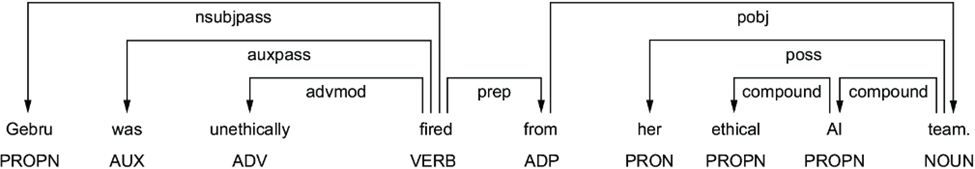

In [28]:
print(f"{'Token':<12} {'POS':<6} {'Dep':<10} {'Head Text'}")
print("-" * 40)

for token in doc:
    # dep_ คือความสัมพันธ์, head คือคำหลัก
    print(f"{token.text:<12} {token.pos_:<6} {token.dep_:<10} {token.head.text}")

Token        POS    Dep        Head Text
----------------------------------------
Steve        PROPN  compound   Jobs
Jobs         PROPN  nsubj      founded
founded      VERB   ROOT       founded
Apple        PROPN  dobj       founded
in           ADP    prep       founded
1976         NUM    pobj       in
.            PUNCT  punct      founded
Bill         PROPN  compound   Gates
Gates        PROPN  nsubj      started
started      VERB   ROOT       started
Microsoft    PROPN  dobj       started
later        ADV    advmod     started
.            PUNCT  punct      started


ตัวอย่าง: "Elon Musk bought Twitter."

1. bought = ROOT (คำกริยาหลัก)
2. Elon Musk = nsubj (Subject: ผู้กระทำ) -> ขยายจากคำหลักคือ bought
3. Twitter = dobj (Object: ผู้ถูกกระทำ) -> ขยายจากคำหลักคือ bought

ตัวอย่างคำสั่งแสดง Dependency Tree

In [29]:
options = {"compact": True, "bg": "#09a3d5", "color": "white", "font": "Source Sans Pro"}
displacy.render(doc, style="dep", jupyter=True, options=options)

*ลองเปลี่ยนประโยคเป็น "Google was founded by Larry Page." แล้วดูว่าลูกศร nsubj (ประธาน) เปลี่ยนไปเป็น nsubjpass (ประธานถูกกระทำ) หรือไม่?*

## 2. Relation Extraction

**Relation Extraction (RE) ** เป็นกระบวนการที่ใช้ค้นหา "ความสัมพันธ์ทางความหมาย" ระหว่างคำเฉพาะ (Entities) สองคำในประโยค เพื่อใช้ในการตอบคำถามว่าสองคำนี้เกี่ยวข้องกันอย่างไร โดยการแปลงข้อความหรือประโยคให้กลายเป็นข้อเท็จจริงในรูปแบบ  Triplet:
(Subject, Predicate/Relation, Object)

ตัวอย่างเช่น
Input: "Elon Musk founded SpaceX in 2002."

- NER (หา Entity): เจอคำว่า Elon Musk (Person) และ SpaceX (Organization)
- Relation Extraction (หาความสัมพันธ์): วิเคราะห์บริบทแล้วสรุปได้ว่าความสัมพันธ์คือ founded (ก่อตั้ง)
Output: ("Elon Musk", "founded", "SpaceX")

**เป้าหมายหลัก:** แปลงประโยคภาษาอังกฤษ ให้เป็นรูปแบบ Triplet:
(Subject, Relation, Object)

ทฤษฏีที่ใช้
### 2.1 ทฤษฎี: The Knowledge Triplet
อธิบายว่า Knowledge Graph ประกอบด้วยหน่วยย่อยที่สุดคือ Triplet (สามสิ่ง) เสมอ:
- Head (Subject): ประธาน
- Relation (Predicate): กริยาหรือความสัมพันธ์
- Tail (Object): กรรม

ตัวอย่าง: "Steve Jobs founded Apple."
- Head: Steve Jobs
- Relation: founded
- Tail: Apple

### 2.2 การวิเคราะห์ Dependency Tree
นำมาใช้ในการสร้าง relation extraction ได้

ตัวอย่างเช่น
- Steve Jobs --(nsubj)--> founded --(dobj)--> Apple

Logic:
- หา ROOT (Verb หลัก) -> นี่คือ Relation
- หา nsubj -> นี่คือ Head
- หา dobj -> นี่คือ Tail

วิธีการทำ มี 2 วิธีหลัก
- Rule-based: เขียนกฎทางไวยากรณ์ (ทดลองเขียนโค้ดด้านล่างนี้) เช่น "ถ้าเจอคำว่า born in ระหว่างชื่อคนกับชื่อเมือง ให้ถือว่าเป็นความสัมพันธ์ สถานที่เกิด"
- Supervised Learning: สอน AI ด้วยตัวอย่างประโยคจำนวนมาก ให้มันเรียนรู้บริบทเอาเองว่าประโยคแบบนี้แปลว่ามีความสัมพันธ์กัน


ทดลองหา dependency tree ของ
text = "Elon Musk bought Twitter."


In [30]:
import spacy
from tabulate import tabulate
from IPython.display import HTML, display
nlp = spacy.load("en_core_web_sm")


doc = nlp(text)

# ลองปริ้นดู Tag ของแต่ละคำ
for token in doc:
    print(token.text, token.tag_)


Steve NNP
Jobs NNP
founded VBD
Apple NNP
in IN
1976 CD
. .
Bill NNP
Gates NNP
started VBD
Microsoft NNP
later RB
. .


In [31]:
table_data = [[token.text , token.pos_ , spacy.explain(token.pos_)] for token in doc]
display(HTML(tabulate(table_data, tablefmt='html')))

Steve,PROPN,proper noun
Jobs,PROPN,proper noun
founded,VERB,verb
Apple,PROPN,proper noun
in,ADP,adposition
1976,NUM,numeral
.,PUNCT,punctuation
Bill,PROPN,proper noun
Gates,PROPN,proper noun
started,VERB,verb
Microsoft,PROPN,proper noun


> 💬 Note
`.pos_` : Part of Speech (ชนิดของคำ)

| ค่า .pos_ | ความหมาย (ไทย) | ตัวอย่าง |
| --- | --- | --- |
| **NOUN** | คำนาม | cat, desk, progress |
| **VERB** | คำกริยา | run, eat, is |
| **ADJ** | คำคุณศัพท์ | big, old, red |
| **ADV** | คำวิเศษณ์ | very, slowly, well |
| **PROPN** | คำนามชี้เฉพาะ | **London**, **John**, **Google** (มักจะตรงกับ Ent) |
| **PRON** | สรรพนาม | I, you, he, it |
| **PUNCT** | เครื่องหมายวรรคตอน | ., ?, !, " |
| **DET** | คำนำหน้านาม | a, an, the |



In [32]:
table_data = [[token.tag_, spacy.explain(token.tag_)] for token in doc]
display(HTML(tabulate(table_data, tablefmt='html')))

NNP,"noun, proper singular"
NNP,"noun, proper singular"
VBD,"verb, past tense"
NNP,"noun, proper singular"
IN,"conjunction, subordinating or preposition"
CD,cardinal number
.,"punctuation mark, sentence closer"
NNP,"noun, proper singular"
NNP,"noun, proper singular"
VBD,"verb, past tense"
NNP,"noun, proper singular"


> 💬 Note<br> `.tag_ (Detailed)`: จะระบุชัดเจนตาม Penn Treebank Standard
---

### 1. หมวดคำกริยา (Verbs) - *ละเอียดที่สุด*

| Tag | ความหมาย | ตัวอย่างคำ |
| --- | --- | --- |
| **VB** | รูปพื้นฐาน (Base form) | eat, run, be |
| **VBD** | อดีตกาล (Past tense) | ate, ran, was |
| **VBG** | เติม -ing (Gerund/Present participle) | eating, running |
| **VBN** | กริยาช่อง 3 (Past participle) | eaten, run, been |
| **VBP** | ปัจจุบันกาล (ที่ไม่ใช่ He/She/It) | (I) **eat**, (They) **run** |
| **VBZ** | ปัจจุบันกาล (สำหรับ He/She/It) | (He) **eats**, (It) **runs** |
| **MD** | กริยาช่วย (Modal) | can, could, will, should |

### 2. หมวดคำนาม (Nouns)

| Tag | ความหมาย | ตัวอย่างคำ |
| --- | --- | --- |
| **NN** | นามเอกพจน์ (Singular) | dog, table |
| **NNS** | นามพหูพจน์ (Plural) | dogs, tables |
| **NNP** | ชื่อเฉพาะเอกพจน์ (Proper Noun Sing.) | London, John, Google |
| **NNPS** | ชื่อเฉพาะพหูพจน์ (Proper Noun Plur.) | iPhones, Vikings |

### 3. หมวดคุณศัพท์และวิเศษณ์ (Adjectives & Adverbs)

| Tag | ความหมาย | ตัวอย่างคำ |
| --- | --- | --- |
| **JJ** | คุณศัพท์ทั่วไป | big, red |
| **JJR** | คุณศัพท์ขั้นกว่า (Comparative) | bigger, redder |
| **JJS** | คุณศัพท์ขั้นสุด (Superlative) | biggest, reddest |
| **RB** | วิเศษณ์ทั่วไป | quickly, very |
| **RBR** | วิเศษณ์ขั้นกว่า | faster, better |
| **RBS** | วิเศษณ์ขั้นสุด | fastest, best |

### 4. หมวดอื่นๆ ที่พบบ่อย

| Tag | ความหมาย | ตัวอย่างคำ |
| --- | --- | --- |
| **PRP** | สรรพนาม (Personal Pronoun) | I, he, she, it |
| **PRP$** | สรรพนามแสดงความเป็นเจ้าของ | my, his, her |
| **DT** | คำนำหน้า (Determiner) | the, a, this |
| **IN** | บุรพบท/คำเชื่อม (Preposition) | in, on, of, if, that |
| **CD** | ตัวเลข (Cardinal Number) | one, 2024, 500 |
| **CC** | คำเชื่อมประโยค (Conjunction) | and, or, but |

---


In [33]:
table_data = [[token.text , token.pos_,token.lemma_]for token in doc]
display(HTML(tabulate(table_data, tablefmt='html')))
#

Steve,PROPN,Steve
Jobs,PROPN,Jobs
founded,VERB,found
Apple,PROPN,Apple
in,ADP,in
1976,NUM,1976
.,PUNCT,.
Bill,PROPN,Bill
Gates,PROPN,Gates
started,VERB,start
Microsoft,PROPN,Microsoft


> 💬 Note
`.lemma_ `= "take" (รู้ความหมายหลัก)

In [34]:
table_data = [[token.text , token.dep_,token.head.text]for token in doc]
display(HTML(tabulate(table_data, tablefmt='html')))

Steve,compound,Jobs
Jobs,nsubj,founded
founded,ROOT,founded
Apple,dobj,founded
in,prep,founded
1976,pobj,in
.,punct,founded
Bill,compound,Gates
Gates,nsubj,started
started,ROOT,started
Microsoft,dobj,started


> 💬 Note
`.dep_` : บอกความสัมพันธ์

In [39]:
import spacy
from spacy import displacy
# ใช้ displacy สร้างไฮไลท์สี
displacy.render(doc, style="ent", jupyter=True)

> Note 💬
 **`displacy.render(doc, style="ent", jupyter=True)

* **`doc`**: คือตัวแปรที่ผ่านการประมวลผลจาก `nlp()` มาแล้ว (ข้างในมีข้อมูล ents อยู่)
  * **`style="ent"`**: คือโหมดการแสดงผล
  * **`"ent"` (Entity):** เน้นไฮไลท์คำนามชี้เฉพาะ (สีสันเป็นแท่งๆ)  **ที่คุณกำลังใช้**
  * **`"dep"` (Dependency):** เน้นแสดงโครงสร้างไวยากรณ์ (เป็นเส้นลูกศรโยงไปมา)


* **`jupyter=True`**: สำคัญมากสำหรับคนใช้ **Jupyter Notebook** หรือ **Google Colab**
  * ถ้าเป็น `True`: มันจะเจน HTML ออกมาแปะในหน้า Notebook ให้เลย
  * ถ้าเป็น `False` (ค่าเริ่มต้น): มันจะคืนค่าเป็น HTML String หรือเปิด Server เพื่อดูบนเว็บ Browser แทน





In [35]:
def get_triplet_v1(text):
    doc = nlp(text)

    subj = None
    obj = None
    relation = None

    # 1. หา Verb หลัก (ROOT)
    for token in doc:
        if token.dep_ == "ROOT":
            relation = token.text

            # 2. เมื่อเจอ Root ให้ดูลูกๆ ของมัน
            for child in token.children:
                if child.dep_ == "nsubj": # Subject
                    subj = child.text
                if child.dep_ == "dobj":  # Object
                    obj = child.text

    return (subj, relation, obj)

# Test
print(get_triplet_v1("Elon Musk bought Twitter."))
# Output: ('Musk', 'bought', 'Twitter')

('Musk', 'bought', 'Twitter')


ปรับปรุงฟังก์ชันให้เก็บคำขยาย

In [36]:
import spacy
nlp = spacy.load("en_core_web_sm")

def get_phrase(token):
    # ฟังก์ชันช่วย: ดึงคำทั้งหมดที่ขยายคำนามนี้ (เช่น "The white house")
    subtree = list(token.subtree)
    # เรียงลำดับคำตามตำแหน่งในประโยค
    subtree.sort(key=lambda x: x.i)
    return " ".join([t.text for t in subtree])

def get_triplet_v2(text):
    doc = nlp(text)

    subj = None
    obj = None
    relation = None

    for token in doc:
        # หา Verb หลัก
        if token.dep_ == "ROOT":
            relation = token.text # หรือ token.lemma_ ถ้าอยากได้รูป infinitive

            for child in token.children:
                if child.dep_ == "nsubj":
                    subj = get_phrase(child) # ใช้ฟังก์ชันช่วยดึงทั้งก้อน
                if child.dep_ == "dobj":
                    obj = get_phrase(child)  # ใช้ฟังก์ชันช่วยดึงทั้งก้อน

    return (subj, relation, obj)

# Test
sentences = [
    "Elon Musk bought Twitter.",
    "The rich man owns a big house.",
    "Steve Jobs founded Apple Inc."
]

for s in sentences:
    print(get_triplet_v2(s))

('Elon Musk', 'bought', 'Twitter')
('The rich man', 'owns', 'a big house')
('Steve Jobs', 'founded', 'Apple Inc.')


**Testing Cases**
ลองใส่ประโยคที่ซับซ้อนขึ้นเพื่อดูข้อจำกัด

ตัวอย่างเช่น "Apple is located in California."
- Result: อาจจะได้ (None, 'located', None) หรือไม่สมบูรณ์
- Why: เพราะโครงสร้างประโยคนี้ใช้ Passive voice หรือ Preposition (in) ซึ่ง California เป็น pobj (Object ของ Preposition) ไม่ใช่ dobj (Object ของ Verb)


**Homework**: ถ้าจะทำ Production จริง ต้องเขียนกฎเพิ่มเพื่อรองรับ attr (is), prep + pobj (in, at, on) หรือใช้ Library สำเร็จรูปเช่น textacy


ทดลองปรับปรุงฟังก์ชันให้ครอบคลุมประโยคที่ซับซ้อนขึ้น